In [2]:
from tidy_data import df

df_cleanned = df


In [5]:
#Use textblob in python: https://www.kaggle.com/code/blessondensil294/beginner-nlp-product-sentiment-analysis-textblob 

import pandas as pd
from textblob import TextBlob

df_sentiment_blob = pd.DataFrame(columns=['date', 'speaker','party','text', 'sentiment', 'subjectivity'])

# temporary list to store the dictionaries
result_data = []

# Loop through the df
for index, row in df_cleanned.iterrows():
    # Get data from df columns
    text = row['text']
    date = row['date']
    party = row['party']
    speaker = row['speaker']

    # Get the sentiment and subjectivity
    sentiment, subjectivity = TextBlob(text).sentiment

    # Append the results to the list
    result_data.append({
        'date': date,
        'speaker': speaker,
        'party': party,
        'speech': text,
        'sentiment': sentiment,
        'subjectivity': subjectivity
    })

# Create a DataFrame from the list of dictionaries
df_sentiment_blob = pd.DataFrame(result_data)


,date,speaker,party,speech,sentiment,subjectivity
0,2010-11-14,Barack Obama,Democratic,"In 1994, APEC Leaders gathered in Bogor, Ind...",0.117910,0.468764
1,2010-11-20,Barack Obama,Democratic,"20 November 2010, Lisbon We, the leaders of ...",0.121169,0.457669
2,2013-06-18,Barack Obama,Democratic,2013 LOUGH ERNE Preamble 1. As leaders of th...,0.137436,0.397606
3,2015-06-08,Barack Obama,Democratic,"Schloss Elmau, Germany We, the leaders of th...",0.127502,0.408159
4,2014-11-16,Barack Obama,Democratic,1. Raising global growth to deliver better l...,0.139775,0.384080
...,...,...,...,...,...,...
2296,2010-04-13,Barack Obama,Democratic,"Forty-one years ago, in the city of Clevelan...",0.227943,0.552546
2297,2013-01-29,Barack Obama,Democratic,"For nearly 2 years, the Asad regime has wage...",0.120734,0.481266
2298,2009-08-05,Barack Obama,Democratic,"Hello, everyone. I'm sorry I couldn't be the...",0.126605,0.442060
2299,2009-10-21,Barack Obama,Democratic,"President Peres, Prime Minister Netanyahu, h...",0.175131,0.511825


C:\Users\augus\AppData\Local\Temp\ipykernel_29640\4197816046.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


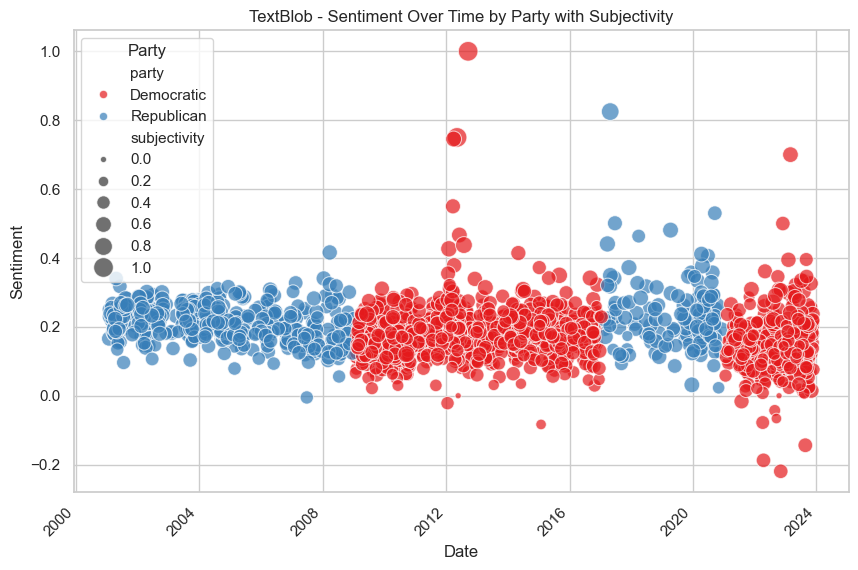

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=df_sentiment_blob,
    x='date',
    y='sentiment',
    hue='party',
    palette='Set1',
    size='subjectivity',  
    sizes=(20, 200), 
    alpha=0.7
)

# Set labels and title
plt.title('TextBlob - Sentiment Over Time by Party with Subjectivity')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Show legend
plt.legend(title='Party', loc='best')

# Improve x-axis date formatting
scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


In [21]:
# What are the lowest sentiment speeches?

# Sort the DataFrame by 'sentiment' in ascending order
lowest_sentiment_df = df_sentiment_blob.sort_values(by='sentiment')


# Create a string to get the info about the lowest sentiment speeches
result_phrase = ""
for index, row in lowest_sentiment_df.head(5).iterrows(): # 5 lowest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Display the result phrase
print(result_phrase)


Joe Biden from Democratic gave a speech on 2022-11-04 00:00:00 with sentiment -0.2194 and subjectivity 0.4973. The speech was:
Taryne, thank you very much for that introduction. And are the bad guys on the other side of the hedge? I mean, what's the story? [Laughter]

Joe Biden from Democratic gave a speech on 2022-04-14 00:00:00 with sentiment -0.1875 and subjectivity 0.5000. The speech was:
Hello, hello, hello, Greensboro. Chancellor. He's going to work at IBM, a little outfit, you know, that is—[laughter].

Joe Biden from Democratic gave a speech on 2023-08-22 00:00:00 with sentiment -0.1437 and subjectivity 0.5125. The speech was:
  Across the country, people are experiencing the devastating impacts of extreme weather worsened by climate change. As peak hurricane season approaches, my administration continues taking action to bolster the country's preparedness and support response and recovery efforts. I continue to be briefed on Tropical Storm Harold and its potential impacts on S

In [22]:

# Sort the DataFrame by 'sentiment' in descendign order
highest_sentiment_df = df_sentiment_blob.sort_values(by='sentiment', ascending=False)

# Create a string to get the info about the highest sentiment speeches
result_phrase = ""
for index, row in highest_sentiment_df.head(5).iterrows(): # 5 highest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Display the result phrase
print(result_phrase)



Barack Obama from Democratic gave a speech on 2012-09-18 00:00:00 with sentiment 1.0000 and subjectivity 1.0000. The speech was:
Thank you. Well, it is wonderful to see all of you. I'm so grateful for all your support.

Donald Trump from Republican gave a speech on 2017-04-26 00:00:00 with sentiment 0.8250 and subjectivity 0.7875. The speech was:
Thank you, Mike. He's been a great Vice President, a great help. And everybody loves Mike Pence. So I just want to thank you for your service. Been incredible. Thank you very much. It's a great honor. Thank you.

Barack Obama from Democratic gave a speech on 2012-05-10 00:00:00 with sentiment 0.7500 and subjectivity 1.0000. The speech was:
Yay! Yay! Nice job!

Barack Obama from Democratic gave a speech on 2012-03-30 00:00:00 with sentiment 0.7453 and subjectivity 0.6150. The speech was:
Hello, Maine! Thank you! Thank you very much. Thank you! Well, it is good to be in South Portland, Maine! I love you! Thank you! It is wonderful to be here.

J